In [1]:
import numpy as np

import random
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Generate fake

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
def normalize(x):
    x_min = x.min()
    x_max = x.max()
    
    x = (x-x_min)/(x_max -x_min)
    return x

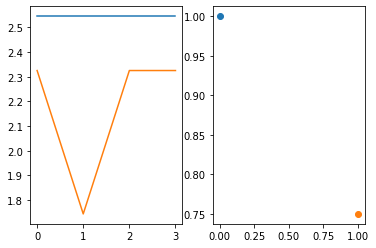

In [4]:
time_steps = 2
n_cells = 4 # Amount of cells in pack
x = np.zeros([time_steps,n_cells])


fig, ax = plt.subplots(1,2)

failed_cell = 1 # Which cell is the failing cell
is_fail = True# Does the pack include a failed cell
volt_stochastic = 0.9
for i in range(time_steps):
    sigma = 0.0 # How much is the fluctuation
    median = random.uniform(2, 4)
    volt = np.random.normal(loc=median, scale=sigma, size=n_cells)
    if is_fail:
        r = random.random()
        if r < volt_stochastic:
            stochstic_amplifier = random.randint(1,10)
            
            y = (1-i/stochstic_amplifier)
            #print(y)
            volt[failed_cell]*=y
    ax[1].scatter(i,y)
    x[i,:] = volt
            
    ax[0].plot(volt, label=i)
#plt.ylim(0,16)
#plt.legend()

In [5]:
def create_sequence(time_steps=2, n_cells=4, failed_cell=1, is_fail=True, sigma=0.0, volt_stochastic = 0.9, normalize_x=False):
    x = np.zeros([time_steps,n_cells])
    for i in range(time_steps):
        median = random.uniform(2, 4)
        volt = np.random.normal(loc=median, scale=sigma, size=n_cells)
        if is_fail:
            r = random.random()
            if r < volt_stochastic:
                stochstic_amplifier = random.randint(1,10) # 100, 1000

                y = (1-i/stochstic_amplifier)
                #print(y)
                volt[failed_cell]*=y
        x[i,:] = volt
    if normalize_x:
        x = normalize(x)
    if is_fail:
        label = 1
    else:
        label = 0
    return x, label
    

In [130]:
time_steps=2 
n_cells=4
failed_cell=1 
is_fail=True 
sigma=0.0 
volt_stochastic = 0.9 
normalize_x=False


In [131]:
x = np.zeros([time_steps,n_cells])
for i in range(time_steps):
    median = random.uniform(2, 4)
    volt = np.random.normal(loc=median, scale=sigma, size=n_cells)
    if is_fail:
        r = random.random()
        if r < volt_stochastic:
            stochstic_amplifier = random.randint(1,10) # 100, 1000

            y = (1-i/stochstic_amplifier)
            #print(y)
            volt[failed_cell]*=y
    x[i,:] = volt
if normalize_x:
    x = normalize(x)
if is_fail:
    label = 1
else:
    label = 0

In [136]:
volt.min()

3.214761002501522

In [135]:
volt.min()

1.8370062871437267

In [6]:
time_steps = 2
n_cells =4
x,y = create_sequence(time_steps=time_steps, n_cells=n_cells, failed_cell=2, is_fail=True, sigma=0.0, volt_stochastic = 0.9, normalize_x=True)



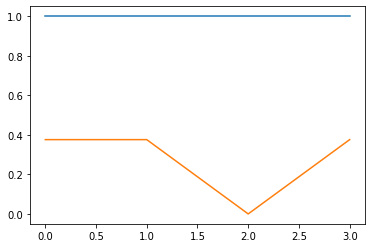

In [7]:
plt.plot(x.T)
plt.show()

In [97]:
def create_data(n_healthy=2, n_fails=2,time_steps=time_steps):
    data = []
    
    data_info ={"index_1":[],
           "index_0": []} 
    
    for i in range(n_healthy+n_fails):
        if i >= n_healthy:
            fail=True
        else:
            fail=False
        x,y = create_sequence(time_steps=time_steps, n_cells=n_cells, failed_cell=2, is_fail=fail, sigma=0.0, volt_stochastic = 0.9, normalize_x=True)
        data.append((torch.FloatTensor(x),y))
        if y == 1:
            data_info["index_1"].append(i)
            
        if y == 0:
            data_info["index_0"].append(i)
            
    return (data, data_info)
    

In [98]:
data, data_info = create_data(n_healthy=10, n_fails=10)

In [99]:
data_info

{'index_1': [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
 'index_0': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]}

In [102]:
data_info["index_1"]

[10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [104]:
np.random.choices(data_info["index_1"], 3)

AttributeError: module 'numpy.random' has no attribute 'choices'

[10, 18, 16, 14, 11, 12, 17, 15, 19, 13]

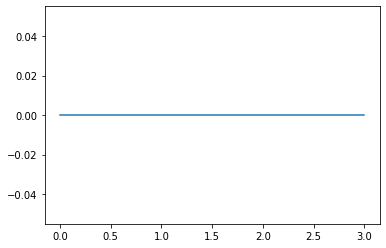

In [112]:
plt.plot(data[10][0][0].T) #Plocka ut näst sista

In [114]:
data[10][0]

tensor([[0., 0., 0., 0.],
        [1., 1., 1., 1.]])

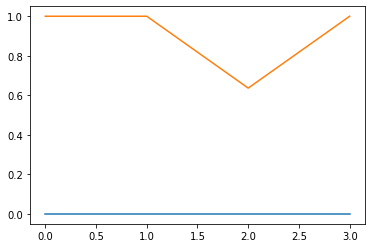

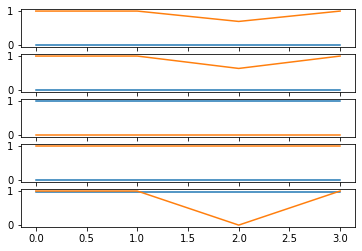

In [128]:
random_samples = random.sample(data_info["index_1"],10)
fig, ax = plt.subplots(5)
for i in range(5):
    ax[i].plot(data[random_samples[i]][0].T)

tensor([[1., 0.],
        [1., 0.],
        [1., 0.],
        [1., 0.]])

In [52]:
data[]

[(tensor([[0., 0., 0., 0.],
          [1., 1., 1., 1.]]),
  0),
 (tensor([[1., 1., 1., 1.],
          [0., 0., 0., 0.]]),
  0),
 (tensor([[0., 0., 0., 0.],
          [1., 1., 1., 1.]]),
  0),
 (tensor([[0., 0., 0., 0.],
          [1., 1., 1., 1.]]),
  0),
 (tensor([[0., 0., 0., 0.],
          [1., 1., 1., 1.]]),
  0),
 (tensor([[1., 1., 1., 1.],
          [0., 0., 0., 0.]]),
  0),
 (tensor([[1., 1., 1., 1.],
          [0., 0., 0., 0.]]),
  0),
 (tensor([[1., 1., 1., 1.],
          [0., 0., 0., 0.]]),
  0),
 (tensor([[1., 1., 1., 1.],
          [0., 0., 0., 0.]]),
  0),
 (tensor([[0., 0., 0., 0.],
          [1., 1., 1., 1.]]),
  0),
 (tensor([[0., 0., 0., 0.],
          [1., 1., 1., 1.]]),
  0),
 (tensor([[0., 0., 0., 0.],
          [1., 1., 1., 1.]]),
  0),
 (tensor([[1., 1., 1., 1.],
          [0., 0., 0., 0.]]),
  0),
 (tensor([[1., 1., 1., 1.],
          [0., 0., 0., 0.]]),
  0),
 (tensor([[0., 0., 0., 0.],
          [1., 1., 1., 1.]]),
  0),
 (tensor([[1., 1., 1., 1.],
          [0

In [54]:
[item for item in a if item[0] == 1]

NameError: name 'a' is not defined

0

In [33]:
# Kolla antalet 0 och 1 i datasettet
n_0 = 0
n_1 = 0
for i in range(len(data)):
    if data[i][1] == 1:
        n_1 +=1
    if data[i][1] == 0:
        n_0 +=1
    
    
print(n_0)
print(n_1)

10000
1000


In [25]:
## Create dataset

In [34]:
train_size = int(len(data)*0.8)
test_size = len(data) - train_size
train_set, test_set = torch.utils.data.random_split(data,[train_size, test_size])
batch_size = 10
train_loader = DataLoader(dataset=train_set, batch_size=batch_size, shuffle=True,drop_last=True)
test_loader = DataLoader(dataset=test_set, batch_size=batch_size, shuffle=True,drop_last=True)

In [35]:
class ANNMultilayerperceptron(nn.Module):

    def __init__(self, input_size=(time_steps*n_cells),output_size=2, layers=[220,84]):  # 120, 84
        super().__init__()

        self.fc1 = nn.Linear(input_size, layers[0])
        self.fc2 = nn.Linear(layers[0], layers[1])
        self.fc2b = nn.Linear(layers[1], 500)
        self.fc2c = nn.Linear(500, layers[1])
        self.fc2d = nn.Linear(layers[1], layers[1])
        self.fc3 = nn.Linear(layers[1], output_size)

    def forward(self,X):
        X = F.relu(self.fc1(X))
        X = F.relu(self.fc2(X))
        X = F.relu(self.fc2b(X))
        X = F.relu(self.fc2c(X))
        X = F.relu(self.fc2d(X))
        X = self.fc3(X)

        return F.log_softmax(X,dim=1) # PGA multiclass classification
        #return X

In [36]:
model = ANNMultilayerperceptron()
model

ANNMultilayerperceptron(
  (fc1): Linear(in_features=8, out_features=220, bias=True)
  (fc2): Linear(in_features=220, out_features=84, bias=True)
  (fc2b): Linear(in_features=84, out_features=500, bias=True)
  (fc2c): Linear(in_features=500, out_features=84, bias=True)
  (fc2d): Linear(in_features=84, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=2, bias=True)
)

In [37]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
#optimizer = torch.optim.Adadelta(model.parameters(), lr=0.001)
#optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

In [38]:
#from ignite.metrics import Precision, Recall
#from ignite.metrics import Precision ### LÄGG TILL IGNITE
#train_precision = Precision()
#train_recall = Recall()

#test_precision = Precision()
#test_recall = Recall()
# https://pytorch.org/ignite/metrics.html


epochs = 10 # Ju störra dataset ju färre epochs behövs

train_losses = []
test_losses = []
train_correct = []
test_correct = []

# For loop epochs 

for i in range(epochs):
    trn_correct = 0
    tst_correct = 0 

    # Train

    for b, (X_train, y_train) in enumerate(train_loader):
        
        # Skip iteration if batch size not equal to stated dim
        
            
        #print(X_train.shape, y_train.shape) 
        
        b += 1
        
        y_pred = model(X_train.view(batch_size, -1))  # Flatten input
        lossTrain = criterion(y_pred, y_train)

        predicted = torch.max(y_pred.data,1)[1]

        #calculate precision and recall
        #train_precision.update((y_pred, y_train))
        #train_recall.update((y_pred, y_train))
      

        batch_corr = (predicted == y_train).sum()
        trn_correct += batch_corr

        optimizer.zero_grad()
        lossTrain.backward()
        optimizer.step()

        if b%2 == 0: 
            print(f"Epoch {i} Batch: {b} Train Loss: {lossTrain.item()}")

    train_losses.append(lossTrain.data.item())
    train_correct.append(trn_correct)

    # Test
    with torch.no_grad():
        for b, (X_test,y_test) in enumerate(test_loader):
            y_val = model(X_train.view(batch_size, -1))

            predicted = torch.max(y_val.data,1)[1]

            
        loss = criterion(y_val, y_test)
        test_losses.append(loss)
        test_correct.append(trn_correct)

        #if b%2 == 0:
            #print(f"Epoch {i} Batch: {b} Train Loss: {lossTrain.item()} Validation Loss: {loss.item()}")


Epoch 0 Batch: 1 Train Loss: 0.7206144332885742
Epoch 0 Batch: 2 Train Loss: 0.7260395288467407
Epoch 0 Batch: 3 Train Loss: 0.721284031867981
Epoch 0 Batch: 4 Train Loss: 0.6992607116699219
Epoch 0 Batch: 5 Train Loss: 0.7109556198120117
Epoch 0 Batch: 6 Train Loss: 0.7113783359527588
Epoch 0 Batch: 7 Train Loss: 0.704898476600647
Epoch 0 Batch: 8 Train Loss: 0.7023300528526306
Epoch 0 Batch: 9 Train Loss: 0.7031729221343994
Epoch 0 Batch: 10 Train Loss: 0.6956555247306824
Epoch 0 Batch: 11 Train Loss: 0.6970252990722656
Epoch 0 Batch: 12 Train Loss: 0.6946864724159241
Epoch 0 Batch: 13 Train Loss: 0.6919562220573425
Epoch 0 Batch: 14 Train Loss: 0.6900253891944885
Epoch 0 Batch: 15 Train Loss: 0.6878281235694885
Epoch 0 Batch: 16 Train Loss: 0.6855993866920471
Epoch 0 Batch: 17 Train Loss: 0.6830440759658813
Epoch 0 Batch: 18 Train Loss: 0.6784285306930542
Epoch 0 Batch: 19 Train Loss: 0.6788907051086426
Epoch 0 Batch: 20 Train Loss: 0.6773935556411743
Epoch 0 Batch: 21 Train Loss: 0

Epoch 0 Batch: 200 Train Loss: 0.33113807439804077
Epoch 0 Batch: 201 Train Loss: 0.49818676710128784
Epoch 0 Batch: 202 Train Loss: 0.28455689549446106
Epoch 0 Batch: 203 Train Loss: 0.09301437437534332
Epoch 0 Batch: 204 Train Loss: 0.3302096426486969
Epoch 0 Batch: 205 Train Loss: 0.08957286179065704
Epoch 0 Batch: 206 Train Loss: 0.6880839467048645
Epoch 0 Batch: 207 Train Loss: 0.6602739095687866
Epoch 0 Batch: 208 Train Loss: 0.09177723526954651
Epoch 0 Batch: 209 Train Loss: 0.2719081938266754
Epoch 0 Batch: 210 Train Loss: 0.09355104714632034
Epoch 0 Batch: 211 Train Loss: 0.2588096559047699
Epoch 0 Batch: 212 Train Loss: 0.25817376375198364
Epoch 0 Batch: 213 Train Loss: 0.2868548631668091
Epoch 0 Batch: 214 Train Loss: 0.43462935090065
Epoch 0 Batch: 215 Train Loss: 0.09273195266723633
Epoch 0 Batch: 216 Train Loss: 0.24564075469970703
Epoch 0 Batch: 217 Train Loss: 0.2868092656135559
Epoch 0 Batch: 218 Train Loss: 0.5398596525192261
Epoch 0 Batch: 219 Train Loss: 0.414334118

Epoch 0 Batch: 389 Train Loss: 0.11494763195514679
Epoch 0 Batch: 390 Train Loss: 0.04408124461770058
Epoch 0 Batch: 391 Train Loss: 0.017241861671209335
Epoch 0 Batch: 392 Train Loss: 0.016527991741895676
Epoch 0 Batch: 393 Train Loss: 0.014517875388264656
Epoch 0 Batch: 394 Train Loss: 0.013782063499093056
Epoch 0 Batch: 395 Train Loss: 0.3078324794769287
Epoch 0 Batch: 396 Train Loss: 0.012227377854287624
Epoch 0 Batch: 397 Train Loss: 0.690844714641571
Epoch 0 Batch: 398 Train Loss: 0.45502883195877075
Epoch 0 Batch: 399 Train Loss: 0.20921678841114044
Epoch 0 Batch: 400 Train Loss: 0.039122555404901505
Epoch 0 Batch: 401 Train Loss: 0.01851819083094597
Epoch 0 Batch: 402 Train Loss: 0.038271479308605194
Epoch 0 Batch: 403 Train Loss: 0.05149281769990921
Epoch 0 Batch: 404 Train Loss: 0.023411735892295837
Epoch 0 Batch: 405 Train Loss: 0.03774969279766083
Epoch 0 Batch: 406 Train Loss: 0.05507909506559372
Epoch 0 Batch: 407 Train Loss: 0.037308163940906525
Epoch 0 Batch: 408 Train 

Epoch 0 Batch: 576 Train Loss: 0.47005701065063477
Epoch 0 Batch: 577 Train Loss: 0.013555832207202911
Epoch 0 Batch: 578 Train Loss: 0.06476106494665146
Epoch 0 Batch: 579 Train Loss: 0.013674517162144184
Epoch 0 Batch: 580 Train Loss: 0.018504548817873
Epoch 0 Batch: 581 Train Loss: 0.017020799219608307
Epoch 0 Batch: 582 Train Loss: 0.4252558648586273
Epoch 0 Batch: 583 Train Loss: 0.01964971236884594
Epoch 0 Batch: 584 Train Loss: 0.020686063915491104
Epoch 0 Batch: 585 Train Loss: 0.02612162195146084
Epoch 0 Batch: 586 Train Loss: 0.02421160787343979
Epoch 0 Batch: 587 Train Loss: 0.021764058619737625
Epoch 0 Batch: 588 Train Loss: 0.022570915520191193
Epoch 0 Batch: 589 Train Loss: 0.0200799573212862
Epoch 0 Batch: 590 Train Loss: 0.01802625134587288
Epoch 0 Batch: 591 Train Loss: 0.018315985798835754
Epoch 0 Batch: 592 Train Loss: 0.013524949550628662
Epoch 0 Batch: 593 Train Loss: 0.012807177379727364
Epoch 0 Batch: 594 Train Loss: 0.011592808179557323
Epoch 0 Batch: 595 Train 

Epoch 0 Batch: 756 Train Loss: 0.006324432790279388
Epoch 0 Batch: 757 Train Loss: 0.5094923973083496
Epoch 0 Batch: 758 Train Loss: 0.13593757152557373
Epoch 0 Batch: 759 Train Loss: 0.009275917895138264
Epoch 0 Batch: 760 Train Loss: 0.006892534904181957
Epoch 0 Batch: 761 Train Loss: 0.007676216308027506
Epoch 0 Batch: 762 Train Loss: 0.008418417535722256
Epoch 0 Batch: 763 Train Loss: 0.008511248975992203
Epoch 0 Batch: 764 Train Loss: 0.009029335342347622
Epoch 0 Batch: 765 Train Loss: 0.009778882376849651
Epoch 0 Batch: 766 Train Loss: 0.009009486995637417
Epoch 0 Batch: 767 Train Loss: 0.4671076834201813
Epoch 0 Batch: 768 Train Loss: 0.011493852362036705
Epoch 0 Batch: 769 Train Loss: 0.012174286879599094
Epoch 0 Batch: 770 Train Loss: 0.012093211524188519
Epoch 0 Batch: 771 Train Loss: 0.45732420682907104
Epoch 0 Batch: 772 Train Loss: 0.013713414780795574
Epoch 0 Batch: 773 Train Loss: 0.01577884331345558
Epoch 0 Batch: 774 Train Loss: 0.017107341438531876
Epoch 0 Batch: 775 

Epoch 2 Batch: 80 Train Loss: 0.006115652155131102
Epoch 2 Batch: 81 Train Loss: 0.006234679836779833
Epoch 2 Batch: 82 Train Loss: 0.006202994380146265
Epoch 2 Batch: 83 Train Loss: 0.006551031023263931
Epoch 2 Batch: 84 Train Loss: 0.006121722050011158
Epoch 2 Batch: 85 Train Loss: 0.005635919515043497
Epoch 2 Batch: 86 Train Loss: 0.005197201389819384
Epoch 2 Batch: 87 Train Loss: 0.005316448863595724
Epoch 2 Batch: 88 Train Loss: 0.004553086124360561
Epoch 2 Batch: 89 Train Loss: 0.004928188864141703
Epoch 2 Batch: 90 Train Loss: 0.5294123291969299
Epoch 2 Batch: 91 Train Loss: 0.004805128090083599
Epoch 2 Batch: 92 Train Loss: 0.00534666096791625
Epoch 2 Batch: 93 Train Loss: 0.005344551056623459
Epoch 2 Batch: 94 Train Loss: 0.004803952760994434
Epoch 2 Batch: 95 Train Loss: 0.005601775832474232
Epoch 2 Batch: 96 Train Loss: 0.005303514655679464
Epoch 2 Batch: 97 Train Loss: 0.00457503879442811
Epoch 2 Batch: 98 Train Loss: 0.005720752757042646
Epoch 2 Batch: 99 Train Loss: 0.005

Epoch 2 Batch: 316 Train Loss: 0.01557684876024723
Epoch 2 Batch: 317 Train Loss: 0.015046986751258373
Epoch 2 Batch: 318 Train Loss: 0.013312840834259987
Epoch 2 Batch: 319 Train Loss: 0.4646011292934418
Epoch 2 Batch: 320 Train Loss: 0.012340033426880836
Epoch 2 Batch: 321 Train Loss: 0.012609121389687061
Epoch 2 Batch: 322 Train Loss: 0.011470114812254906
Epoch 2 Batch: 323 Train Loss: 0.013139801099896431
Epoch 2 Batch: 324 Train Loss: 0.012891612946987152
Epoch 2 Batch: 325 Train Loss: 0.011026700958609581
Epoch 2 Batch: 326 Train Loss: 0.01191749144345522
Epoch 2 Batch: 327 Train Loss: 0.012949420139193535
Epoch 2 Batch: 328 Train Loss: 0.011514350771903992
Epoch 2 Batch: 329 Train Loss: 0.010585291311144829
Epoch 2 Batch: 330 Train Loss: 0.4613000750541687
Epoch 2 Batch: 331 Train Loss: 0.00999913178384304
Epoch 2 Batch: 332 Train Loss: 0.011300044134259224
Epoch 2 Batch: 333 Train Loss: 0.011298896744847298
Epoch 2 Batch: 334 Train Loss: 0.011112253181636333
Epoch 2 Batch: 335 

Epoch 2 Batch: 552 Train Loss: 0.005397534463554621
Epoch 2 Batch: 553 Train Loss: 0.006128713954240084
Epoch 2 Batch: 554 Train Loss: 0.004431693349033594
Epoch 2 Batch: 555 Train Loss: 0.005926233250647783
Epoch 2 Batch: 556 Train Loss: 0.0050352634862065315
Epoch 2 Batch: 557 Train Loss: 0.0037870858795940876
Epoch 2 Batch: 558 Train Loss: 0.0041586896404623985
Epoch 2 Batch: 559 Train Loss: 0.005126572214066982
Epoch 2 Batch: 560 Train Loss: 0.00464978814125061
Epoch 2 Batch: 561 Train Loss: 0.0041956594213843346
Epoch 2 Batch: 562 Train Loss: 0.004089906811714172
Epoch 2 Batch: 563 Train Loss: 0.004320940468460321
Epoch 2 Batch: 564 Train Loss: 0.004875755403190851
Epoch 2 Batch: 565 Train Loss: 0.004166923463344574
Epoch 2 Batch: 566 Train Loss: 0.003416307270526886
Epoch 2 Batch: 567 Train Loss: 0.00416071992367506
Epoch 2 Batch: 568 Train Loss: 0.004338868893682957
Epoch 2 Batch: 569 Train Loss: 0.004244337789714336
Epoch 2 Batch: 570 Train Loss: 0.004109574481844902
Epoch 2 Ba

Epoch 2 Batch: 788 Train Loss: 0.004517714027315378
Epoch 2 Batch: 789 Train Loss: 0.002988760592415929
Epoch 2 Batch: 790 Train Loss: 0.003365822834894061
Epoch 2 Batch: 791 Train Loss: 0.002204697346314788
Epoch 2 Batch: 792 Train Loss: 0.0034756262321025133
Epoch 2 Batch: 793 Train Loss: 0.0027930079959332943
Epoch 2 Batch: 794 Train Loss: 0.0029448973946273327
Epoch 2 Batch: 795 Train Loss: 0.0025302921421825886
Epoch 2 Batch: 796 Train Loss: 0.0030935797840356827
Epoch 2 Batch: 797 Train Loss: 0.003254211274906993
Epoch 2 Batch: 798 Train Loss: 0.07302802056074142
Epoch 2 Batch: 799 Train Loss: 0.0029407928232103586
Epoch 2 Batch: 800 Train Loss: 0.0030322102829813957
Epoch 2 Batch: 801 Train Loss: 0.6041494607925415
Epoch 2 Batch: 802 Train Loss: 0.003726387396454811
Epoch 2 Batch: 803 Train Loss: 0.5873326659202576
Epoch 2 Batch: 804 Train Loss: 0.00461231404915452
Epoch 2 Batch: 805 Train Loss: 0.005812336690723896
Epoch 2 Batch: 806 Train Loss: 0.5488557815551758
Epoch 2 Batch

Epoch 4 Batch: 82 Train Loss: 0.00587550550699234
Epoch 4 Batch: 83 Train Loss: 0.007945643737912178
Epoch 4 Batch: 84 Train Loss: 0.009536398574709892
Epoch 4 Batch: 85 Train Loss: 0.006561527960002422
Epoch 4 Batch: 86 Train Loss: 0.006404203362762928
Epoch 4 Batch: 87 Train Loss: 0.006149954162538052
Epoch 4 Batch: 88 Train Loss: 0.007153999991714954
Epoch 4 Batch: 89 Train Loss: 0.005498270038515329
Epoch 4 Batch: 90 Train Loss: 0.007194823585450649
Epoch 4 Batch: 91 Train Loss: 0.005114406812936068
Epoch 4 Batch: 92 Train Loss: 0.006321945693343878
Epoch 4 Batch: 93 Train Loss: 0.004836197942495346
Epoch 4 Batch: 94 Train Loss: 0.006423745304346085
Epoch 4 Batch: 95 Train Loss: 0.004563518334180117
Epoch 4 Batch: 96 Train Loss: 0.005212224088609219
Epoch 4 Batch: 97 Train Loss: 0.005551463924348354
Epoch 4 Batch: 98 Train Loss: 0.5764002203941345
Epoch 4 Batch: 99 Train Loss: 0.005438012070953846
Epoch 4 Batch: 100 Train Loss: 0.005141331348568201
Epoch 4 Batch: 101 Train Loss: 0.

Epoch 4 Batch: 315 Train Loss: 0.010642129927873611
Epoch 4 Batch: 316 Train Loss: 0.011135146021842957
Epoch 4 Batch: 317 Train Loss: 0.01485928613692522
Epoch 4 Batch: 318 Train Loss: 0.014457473531365395
Epoch 4 Batch: 319 Train Loss: 0.014973469078540802
Epoch 4 Batch: 320 Train Loss: 0.015328660607337952
Epoch 4 Batch: 321 Train Loss: 0.011780396103858948
Epoch 4 Batch: 322 Train Loss: 0.01088559441268444
Epoch 4 Batch: 323 Train Loss: 0.013685840182006359
Epoch 4 Batch: 324 Train Loss: 0.01560142356902361
Epoch 4 Batch: 325 Train Loss: 0.015053664334118366
Epoch 4 Batch: 326 Train Loss: 0.013891613110899925
Epoch 4 Batch: 327 Train Loss: 0.4544221758842468
Epoch 4 Batch: 328 Train Loss: 0.01248745433986187
Epoch 4 Batch: 329 Train Loss: 0.01565631851553917
Epoch 4 Batch: 330 Train Loss: 0.013876902870833874
Epoch 4 Batch: 331 Train Loss: 0.42389434576034546
Epoch 4 Batch: 332 Train Loss: 0.012628707103431225
Epoch 4 Batch: 333 Train Loss: 0.015927007421851158
Epoch 4 Batch: 334 T

Epoch 4 Batch: 477 Train Loss: 0.0073365261778235435
Epoch 4 Batch: 478 Train Loss: 0.007580970413982868
Epoch 4 Batch: 479 Train Loss: 0.008386889472603798
Epoch 4 Batch: 480 Train Loss: 0.007863141596317291
Epoch 4 Batch: 481 Train Loss: 0.007947414182126522
Epoch 4 Batch: 482 Train Loss: 0.008098159916698933
Epoch 4 Batch: 483 Train Loss: 0.009331243112683296
Epoch 4 Batch: 484 Train Loss: 0.014774657785892487
Epoch 4 Batch: 485 Train Loss: 0.009358825162053108
Epoch 4 Batch: 486 Train Loss: 0.01365751214325428
Epoch 4 Batch: 487 Train Loss: 0.008166155777871609
Epoch 4 Batch: 488 Train Loss: 0.009847353212535381
Epoch 4 Batch: 489 Train Loss: 0.006547875702381134
Epoch 4 Batch: 490 Train Loss: 0.007834351621568203
Epoch 4 Batch: 491 Train Loss: 0.00904439389705658
Epoch 4 Batch: 492 Train Loss: 0.008413090370595455
Epoch 4 Batch: 493 Train Loss: 0.009048636071383953
Epoch 4 Batch: 494 Train Loss: 0.0077638812363147736
Epoch 4 Batch: 495 Train Loss: 0.007740039378404617
Epoch 4 Batc

Epoch 4 Batch: 637 Train Loss: 0.009560264647006989
Epoch 4 Batch: 638 Train Loss: 0.009927205741405487
Epoch 4 Batch: 639 Train Loss: 0.010241634212434292
Epoch 4 Batch: 640 Train Loss: 0.008439334109425545
Epoch 4 Batch: 641 Train Loss: 0.009702911600470543
Epoch 4 Batch: 642 Train Loss: 0.008813779801130295
Epoch 4 Batch: 643 Train Loss: 0.009995242580771446
Epoch 4 Batch: 644 Train Loss: 0.011162573471665382
Epoch 4 Batch: 645 Train Loss: 0.009786268696188927
Epoch 4 Batch: 646 Train Loss: 0.010207719169557095
Epoch 4 Batch: 647 Train Loss: 0.009743648581206799
Epoch 4 Batch: 648 Train Loss: 0.009622490033507347
Epoch 4 Batch: 649 Train Loss: 0.01055431179702282
Epoch 4 Batch: 650 Train Loss: 0.010350385680794716
Epoch 4 Batch: 651 Train Loss: 0.008999449200928211
Epoch 4 Batch: 652 Train Loss: 0.008774657733738422
Epoch 4 Batch: 653 Train Loss: 0.4705159664154053
Epoch 4 Batch: 654 Train Loss: 0.006552876438945532
Epoch 4 Batch: 655 Train Loss: 0.008833745494484901
Epoch 4 Batch: 

Epoch 4 Batch: 811 Train Loss: 0.011179287917912006
Epoch 4 Batch: 812 Train Loss: 0.010388670489192009
Epoch 4 Batch: 813 Train Loss: 0.01040983758866787
Epoch 4 Batch: 814 Train Loss: 0.009243441745638847
Epoch 4 Batch: 815 Train Loss: 0.00889967568218708
Epoch 4 Batch: 816 Train Loss: 0.007994761690497398
Epoch 4 Batch: 817 Train Loss: 0.009584948420524597
Epoch 4 Batch: 818 Train Loss: 0.009395058266818523
Epoch 4 Batch: 819 Train Loss: 0.007938927039504051
Epoch 4 Batch: 820 Train Loss: 0.007773169316351414
Epoch 4 Batch: 821 Train Loss: 0.008462246507406235
Epoch 4 Batch: 822 Train Loss: 0.008134469389915466
Epoch 4 Batch: 823 Train Loss: 0.007946593686938286
Epoch 4 Batch: 824 Train Loss: 0.007595784962177277
Epoch 4 Batch: 825 Train Loss: 0.007333159446716309
Epoch 4 Batch: 826 Train Loss: 0.007104068994522095
Epoch 4 Batch: 827 Train Loss: 0.005481657572090626
Epoch 4 Batch: 828 Train Loss: 0.5097951889038086
Epoch 4 Batch: 829 Train Loss: 0.005376162938773632
Epoch 4 Batch: 8

Epoch 6 Batch: 166 Train Loss: 0.00841977447271347
Epoch 6 Batch: 167 Train Loss: 0.011305948719382286
Epoch 6 Batch: 168 Train Loss: 0.012372943572700024
Epoch 6 Batch: 169 Train Loss: 0.011007258668541908
Epoch 6 Batch: 170 Train Loss: 0.012298031710088253
Epoch 6 Batch: 171 Train Loss: 0.010075571946799755
Epoch 6 Batch: 172 Train Loss: 0.009907960891723633
Epoch 6 Batch: 173 Train Loss: 0.011273456737399101
Epoch 6 Batch: 174 Train Loss: 0.01081786211580038
Epoch 6 Batch: 175 Train Loss: 0.4518871307373047
Epoch 6 Batch: 176 Train Loss: 0.011995695531368256
Epoch 6 Batch: 177 Train Loss: 0.009622100740671158
Epoch 6 Batch: 178 Train Loss: 0.00994171667844057
Epoch 6 Batch: 179 Train Loss: 0.01154136098921299
Epoch 6 Batch: 180 Train Loss: 0.011505039408802986
Epoch 6 Batch: 181 Train Loss: 0.010740597732365131
Epoch 6 Batch: 182 Train Loss: 0.009981108829379082
Epoch 6 Batch: 183 Train Loss: 0.4464770257472992
Epoch 6 Batch: 184 Train Loss: 0.012507528066635132
Epoch 6 Batch: 185 T

Epoch 6 Batch: 385 Train Loss: 0.01854744181036949
Epoch 6 Batch: 386 Train Loss: 0.016516055911779404
Epoch 6 Batch: 387 Train Loss: 0.015437392517924309
Epoch 6 Batch: 388 Train Loss: 0.01734290085732937
Epoch 6 Batch: 389 Train Loss: 0.017608487978577614
Epoch 6 Batch: 390 Train Loss: 0.01723356731235981
Epoch 6 Batch: 391 Train Loss: 0.01594505086541176
Epoch 6 Batch: 392 Train Loss: 0.016982141882181168
Epoch 6 Batch: 393 Train Loss: 0.8122976422309875
Epoch 6 Batch: 394 Train Loss: 0.019712267443537712
Epoch 6 Batch: 395 Train Loss: 0.020471958443522453
Epoch 6 Batch: 396 Train Loss: 0.01870940439403057
Epoch 6 Batch: 397 Train Loss: 0.022170808166265488
Epoch 6 Batch: 398 Train Loss: 0.019229546189308167
Epoch 6 Batch: 399 Train Loss: 0.02085280418395996
Epoch 6 Batch: 400 Train Loss: 0.017782727256417274
Epoch 6 Batch: 401 Train Loss: 0.016852933913469315
Epoch 6 Batch: 402 Train Loss: 0.020882299169898033
Epoch 6 Batch: 403 Train Loss: 0.017196888104081154
Epoch 6 Batch: 404 T

Epoch 6 Batch: 544 Train Loss: 0.40794286131858826
Epoch 6 Batch: 545 Train Loss: 0.016095325350761414
Epoch 6 Batch: 546 Train Loss: 0.013742099516093731
Epoch 6 Batch: 547 Train Loss: 0.016424236819148064
Epoch 6 Batch: 548 Train Loss: 0.017107123509049416
Epoch 6 Batch: 549 Train Loss: 0.011476623825728893
Epoch 6 Batch: 550 Train Loss: 0.014034727588295937
Epoch 6 Batch: 551 Train Loss: 0.012963404878973961
Epoch 6 Batch: 552 Train Loss: 0.4693244397640228
Epoch 6 Batch: 553 Train Loss: 0.012379886582493782
Epoch 6 Batch: 554 Train Loss: 0.0173120629042387
Epoch 6 Batch: 555 Train Loss: 0.016358816996216774
Epoch 6 Batch: 556 Train Loss: 0.016666229814291
Epoch 6 Batch: 557 Train Loss: 0.017702965065836906
Epoch 6 Batch: 558 Train Loss: 0.015340762212872505
Epoch 6 Batch: 559 Train Loss: 0.015536339953541756
Epoch 6 Batch: 560 Train Loss: 0.01618758961558342
Epoch 6 Batch: 561 Train Loss: 0.014597170054912567
Epoch 6 Batch: 562 Train Loss: 0.016244951635599136
Epoch 6 Batch: 563 Tr

Epoch 6 Batch: 704 Train Loss: 0.00501555809751153
Epoch 6 Batch: 705 Train Loss: 0.0055795167572796345
Epoch 6 Batch: 706 Train Loss: 0.522156834602356
Epoch 6 Batch: 707 Train Loss: 0.005264010746032
Epoch 6 Batch: 708 Train Loss: 0.006326386239379644
Epoch 6 Batch: 709 Train Loss: 0.006268353201448917
Epoch 6 Batch: 710 Train Loss: 0.006870018783956766
Epoch 6 Batch: 711 Train Loss: 0.00584469735622406
Epoch 6 Batch: 712 Train Loss: 0.005808666348457336
Epoch 6 Batch: 713 Train Loss: 0.005721792578697205
Epoch 6 Batch: 714 Train Loss: 0.514931321144104
Epoch 6 Batch: 715 Train Loss: 0.006637109909206629
Epoch 6 Batch: 716 Train Loss: 0.006650020368397236
Epoch 6 Batch: 717 Train Loss: 0.9936162233352661
Epoch 6 Batch: 718 Train Loss: 0.007365291006863117
Epoch 6 Batch: 719 Train Loss: 0.010146822780370712
Epoch 6 Batch: 720 Train Loss: 0.010917523875832558
Epoch 6 Batch: 721 Train Loss: 0.01054761279374361
Epoch 6 Batch: 722 Train Loss: 0.012742610648274422
Epoch 6 Batch: 723 Train 

Epoch 8 Batch: 1 Train Loss: 0.013830861076712608
Epoch 8 Batch: 2 Train Loss: 0.010681130923330784
Epoch 8 Batch: 3 Train Loss: 0.012439492158591747
Epoch 8 Batch: 4 Train Loss: 0.4345153868198395
Epoch 8 Batch: 5 Train Loss: 0.011400263756513596
Epoch 8 Batch: 6 Train Loss: 0.01194423995912075
Epoch 8 Batch: 7 Train Loss: 0.010635705664753914
Epoch 8 Batch: 8 Train Loss: 0.012215976603329182
Epoch 8 Batch: 9 Train Loss: 0.010934924706816673
Epoch 8 Batch: 10 Train Loss: 0.010829092003405094
Epoch 8 Batch: 11 Train Loss: 0.010426322929561138
Epoch 8 Batch: 12 Train Loss: 0.4824633002281189
Epoch 8 Batch: 13 Train Loss: 0.01295925211161375
Epoch 8 Batch: 14 Train Loss: 0.009671157225966454
Epoch 8 Batch: 15 Train Loss: 0.012626992538571358
Epoch 8 Batch: 16 Train Loss: 0.013287356123328209
Epoch 8 Batch: 17 Train Loss: 0.012043843977153301
Epoch 8 Batch: 18 Train Loss: 0.013145886361598969
Epoch 8 Batch: 19 Train Loss: 0.010319476947188377
Epoch 8 Batch: 20 Train Loss: 0.01112965680658

Epoch 8 Batch: 170 Train Loss: 0.016081562265753746
Epoch 8 Batch: 171 Train Loss: 0.013523587957024574
Epoch 8 Batch: 172 Train Loss: 0.013255471363663673
Epoch 8 Batch: 173 Train Loss: 0.014338779263198376
Epoch 8 Batch: 174 Train Loss: 0.010573921725153923
Epoch 8 Batch: 175 Train Loss: 0.014411039650440216
Epoch 8 Batch: 176 Train Loss: 0.01359475590288639
Epoch 8 Batch: 177 Train Loss: 0.009411109611392021
Epoch 8 Batch: 178 Train Loss: 0.013087858445942402
Epoch 8 Batch: 179 Train Loss: 0.008416073396801949
Epoch 8 Batch: 180 Train Loss: 0.009123256430029869
Epoch 8 Batch: 181 Train Loss: 0.008703813888132572
Epoch 8 Batch: 182 Train Loss: 0.010267822071909904
Epoch 8 Batch: 183 Train Loss: 0.009981540031731129
Epoch 8 Batch: 184 Train Loss: 0.008827170357108116
Epoch 8 Batch: 185 Train Loss: 0.008617207407951355
Epoch 8 Batch: 186 Train Loss: 0.008557343855500221
Epoch 8 Batch: 187 Train Loss: 0.008675489574670792
Epoch 8 Batch: 188 Train Loss: 0.006199497263878584
Epoch 8 Batch

Epoch 8 Batch: 329 Train Loss: 0.00877129752188921
Epoch 8 Batch: 330 Train Loss: 0.008733617141842842
Epoch 8 Batch: 331 Train Loss: 0.00785329844802618
Epoch 8 Batch: 332 Train Loss: 0.006698682904243469
Epoch 8 Batch: 333 Train Loss: 0.008203993551433086
Epoch 8 Batch: 334 Train Loss: 0.005645120050758123
Epoch 8 Batch: 335 Train Loss: 0.007959066890180111
Epoch 8 Batch: 336 Train Loss: 0.006066571921110153
Epoch 8 Batch: 337 Train Loss: 0.006749673280864954
Epoch 8 Batch: 338 Train Loss: 0.4954395294189453
Epoch 8 Batch: 339 Train Loss: 0.007366567850112915
Epoch 8 Batch: 340 Train Loss: 0.48894110321998596
Epoch 8 Batch: 341 Train Loss: 0.005556266289204359
Epoch 8 Batch: 342 Train Loss: 0.007695489563047886
Epoch 8 Batch: 343 Train Loss: 0.009240671992301941
Epoch 8 Batch: 344 Train Loss: 0.008338140323758125
Epoch 8 Batch: 345 Train Loss: 0.006158673204481602
Epoch 8 Batch: 346 Train Loss: 0.009885862469673157
Epoch 8 Batch: 347 Train Loss: 0.007463610265403986
Epoch 8 Batch: 34

Epoch 8 Batch: 562 Train Loss: 0.008199566043913364
Epoch 8 Batch: 563 Train Loss: 0.007770112250000238
Epoch 8 Batch: 564 Train Loss: 0.0059187207370996475
Epoch 8 Batch: 565 Train Loss: 0.006538978312164545
Epoch 8 Batch: 566 Train Loss: 0.00544483819976449
Epoch 8 Batch: 567 Train Loss: 0.006767584476619959
Epoch 8 Batch: 568 Train Loss: 0.006538530346006155
Epoch 8 Batch: 569 Train Loss: 0.006421045400202274
Epoch 8 Batch: 570 Train Loss: 0.005510421935468912
Epoch 8 Batch: 571 Train Loss: 0.005940139293670654
Epoch 8 Batch: 572 Train Loss: 0.00574751291424036
Epoch 8 Batch: 573 Train Loss: 0.005533994175493717
Epoch 8 Batch: 574 Train Loss: 0.005302720703184605
Epoch 8 Batch: 575 Train Loss: 0.005191609729081392
Epoch 8 Batch: 576 Train Loss: 0.005605801474303007
Epoch 8 Batch: 577 Train Loss: 0.00543431518599391
Epoch 8 Batch: 578 Train Loss: 0.005346968770027161
Epoch 8 Batch: 579 Train Loss: 0.004612045828253031
Epoch 8 Batch: 580 Train Loss: 0.0044515663757920265
Epoch 8 Batch

Epoch 8 Batch: 722 Train Loss: 0.010376440361142159
Epoch 8 Batch: 723 Train Loss: 0.010685616172850132
Epoch 8 Batch: 724 Train Loss: 0.011083207093179226
Epoch 8 Batch: 725 Train Loss: 0.008481191471219063
Epoch 8 Batch: 726 Train Loss: 0.00848471000790596
Epoch 8 Batch: 727 Train Loss: 0.009152904152870178
Epoch 8 Batch: 728 Train Loss: 0.007051208056509495
Epoch 8 Batch: 729 Train Loss: 0.0076396772637963295
Epoch 8 Batch: 730 Train Loss: 0.007352763321250677
Epoch 8 Batch: 731 Train Loss: 0.0067216320894658566
Epoch 8 Batch: 732 Train Loss: 0.006174447480589151
Epoch 8 Batch: 733 Train Loss: 0.005615527741611004
Epoch 8 Batch: 734 Train Loss: 0.00669772457331419
Epoch 8 Batch: 735 Train Loss: 0.006433135364204645
Epoch 8 Batch: 736 Train Loss: 0.005708866752684116
Epoch 8 Batch: 737 Train Loss: 0.004806048236787319
Epoch 8 Batch: 738 Train Loss: 0.005513220094144344
Epoch 8 Batch: 739 Train Loss: 0.549644947052002
Epoch 8 Batch: 740 Train Loss: 0.004166022874414921
Epoch 8 Batch: 

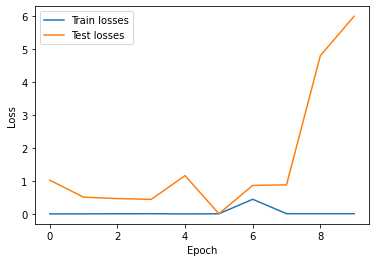

In [39]:
plt.plot(train_losses, label="Train losses")
plt.plot(test_losses, label= "Test losses")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

In [40]:
import numpy as np
for _ in range(100):
    # Select random sample
    i = np.random.randint(1,len(test_set))
    x = test_set[i][0]
    y = test_set[i][1]


    # Evaluate on sample
    model.eval()
    with torch.no_grad():
        new_pred =model(x.view(1,-1))
        pred_int = int(torch.max(new_pred.data,1)[1])
    print(f"Random sample {i} selected with state {y}. Model predict state is {pred_int}")

Random sample 1465 selected with state 0. Model predict state is 0
Random sample 514 selected with state 0. Model predict state is 0
Random sample 1380 selected with state 0. Model predict state is 0
Random sample 1874 selected with state 0. Model predict state is 0
Random sample 1817 selected with state 0. Model predict state is 0
Random sample 2015 selected with state 0. Model predict state is 0
Random sample 359 selected with state 1. Model predict state is 1
Random sample 349 selected with state 0. Model predict state is 0
Random sample 1158 selected with state 0. Model predict state is 0
Random sample 545 selected with state 0. Model predict state is 0
Random sample 1919 selected with state 1. Model predict state is 1
Random sample 762 selected with state 0. Model predict state is 0
Random sample 1286 selected with state 1. Model predict state is 1
Random sample 2160 selected with state 0. Model predict state is 0
Random sample 484 selected with state 0. Model predict state is 0
R

In [222]:
import numpy as np
for _ in range(100):
    # Select random sample
    i = np.random.randint(1,len(train_set))
    x = train_set[i][0]
    y = train_set[i][1]


    # Evaluate on sample
    model.eval()
    with torch.no_grad():
        new_pred =model(x.view(1,-1))
        pred_int = int(torch.max(new_pred.data,1)[1])
    print(f"Random sample {i} selected with state {y}. Model predict state is {pred_int}")

Random sample 2535 selected with state 0. Model predict state is 0
Random sample 4295 selected with state 0. Model predict state is 0
Random sample 2880 selected with state 0. Model predict state is 0
Random sample 1189 selected with state 0. Model predict state is 0
Random sample 4404 selected with state 0. Model predict state is 0
Random sample 6846 selected with state 0. Model predict state is 0
Random sample 1092 selected with state 0. Model predict state is 0
Random sample 7774 selected with state 0. Model predict state is 0
Random sample 3671 selected with state 0. Model predict state is 0
Random sample 4150 selected with state 0. Model predict state is 0
Random sample 7037 selected with state 0. Model predict state is 0
Random sample 2363 selected with state 0. Model predict state is 0
Random sample 4698 selected with state 0. Model predict state is 0
Random sample 6368 selected with state 0. Model predict state is 0
Random sample 5386 selected with state 0. Model predict state 

## Create confusion matrix

In [47]:
len(test_set)

2200

In [49]:
test_loader_all = DataLoader(dataset=test_set, batch_size=len(test_set), shuffle=True,drop_last=True)

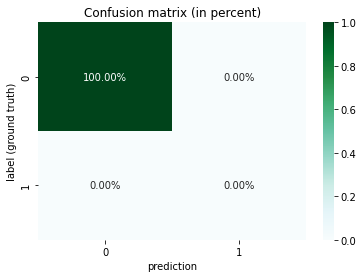

In [50]:
with torch.no_grad():
    correct = 0
    for X_test, y_test in test_loader_all:
        y_val = model(X_test.view(len(test_set),-1))
        predicted = torch.max(y_val,1)[1]
        correct += (predicted == y_test).sum()
        
# Create confusion matrix        
arr = confusion_matrix(y_test.view(-1), predicted.view(-1))

arr2 = np.zeros([2,2])
arr2[0] = (arr[0]/arr[0].sum()).astype(int)
arr2[1] = (arr[1]/arr[1].sum()).astype(int)

df_cm = pd.DataFrame(arr2)
#sns.heatmap(df_cm, annot=True, cmap="BuGn")
sns.heatmap(df_cm, annot=True, cmap="BuGn",fmt='.2%')
plt.xlabel("prediction")
plt.ylabel("label (ground truth)")
plt.title("Confusion matrix (in percent)")
plt.show()

In [48]:
y_test

tensor([0, 1, 0,  ..., 0, 0, 0])

In [51]:
predicted

tensor([0, 0, 0,  ..., 0, 0, 0])